<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#N-Risky-Assets-Portfolio" data-toc-modified-id="N-Risky-Assets-Portfolio-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>N Risky Assets Portfolio</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#We-do-a-lot-of-algebra-by-hand-to-get-$w$." data-toc-modified-id="We-do-a-lot-of-algebra-by-hand-to-get-$w$.-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>We do a lot of algebra by hand to get $w$.</a></span></li><li><span><a href="#We-stack-the-FoCs-into-a-matrix-directly-and-solve-it-with-a-computer" data-toc-modified-id="We-stack-the-FoCs-into-a-matrix-directly-and-solve-it-with-a-computer-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>We stack the FoCs into a matrix directly and solve it with a computer</a></span></li></ul></li></ul></li><li><span><a href="#Compute-the-optimal-portfolios" data-toc-modified-id="Compute-the-optimal-portfolios-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compute the optimal portfolios</a></span><ul class="toc-item"><li><span><a href="#Find-w-so-that-R=0" data-toc-modified-id="Find-w-so-that-R=0-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Find w so that R=0</a></span><ul class="toc-item"><li><span><a href="#Professor's-way" data-toc-modified-id="Professor's-way-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Professor's way</a></span></li><li><span><a href="#My-way" data-toc-modified-id="My-way-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>My way</a></span></li></ul></li><li><span><a href="#R=1" data-toc-modified-id="R=1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>R=1</a></span><ul class="toc-item"><li><span><a href="#Professor's-Way" data-toc-modified-id="Professor's-Way-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Professor's Way</a></span></li><li><span><a href="#My-way" data-toc-modified-id="My-way-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>My way</a></span></li></ul></li></ul></li><li><span><a href="#Find-w-such-that-r-=-0.1955" data-toc-modified-id="Find-w-such-that-r-=-0.1955-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find w such that r = 0.1955</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Professor's-Way" data-toc-modified-id="Professor's-Way-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Professor's Way</a></span></li><li><span><a href="#My-Way" data-toc-modified-id="My-Way-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>My Way</a></span></li></ul></li></ul></li><li><span><a href="#Write-and-interpret-the-Efficient-Frontier-Equation" data-toc-modified-id="Write-and-interpret-the-Efficient-Frontier-Equation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Write and interpret the Efficient Frontier Equation</a></span></li><li><span><a href="#Risk-Free-Asset" data-toc-modified-id="Risk-Free-Asset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Risk-Free Asset</a></span></li><li><span><a href="#Diversification" data-toc-modified-id="Diversification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Diversification</a></span><ul class="toc-item"><li><span><a href="#Question-1" data-toc-modified-id="Question-1-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Question 1</a></span></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Question 2</a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Question 3</a></span></li></ul></li></ul></div>

In [4]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize
import seaborn as sns

config = {
    'figure.facecolor':'w',
    'axes.grid':True,
    'axes.spines.top':False,
    'axes.spines.bottom':False,
    'axes.spines.left':False,
    'axes.spines.right':False,
    'grid.linewidth':0.5,
    'grid.linestyle':'--',
    'figure.constrained_layout.use':True
}

plt.rcParams.update(config)

# N Risky Assets Portfolio

Here's our data:

Given three assets characterized by:

| Asset | Expected Return |
|-------|-----------------|
|   1   |       11        |
|   2   |        9        |
|   3   |       42        |

The Variance-covariance Matrix is defined as:

$$\Omega = \begin{bmatrix}
0.0064 & 0.00336 & 0.011088 \\
0.00336 & 0.0049  & 0.008316 \\
0.011088 & 0.008316 & 0.1089 \\
\end{bmatrix} $$

There is no Risk-free asset.

In [5]:
r = np.array([0.11, 0.09, 0.42])

Ω = np.array([
    [0.0064, 0.00336, 0.011088],
    [0.00336, 0.0049, 0.008316],
    [0.011088, 0.008316, 0.1089]
])

## Question 1

Write down the objective function.

We're still doing what we've always done: we seek weights $w$ to minimize the variance of our portfolio, and the weights should all add up to 1. 

We're going to add one new constraint, that the resulting portfolio have exactly returns $\mu_p$. That is, we want $w^T \mu = \mu_p$. Putting all these requiremnts into a constrained optimization gives:


$$\min_{w}\frac{1}{2}w^T \Sigma w, \quad s.t. \begin{cases} w^T \textbf 1 = 1 \\ w^T \mu = \mu_p \end{cases}$$

**Important note**
You should remember that $y^T X y$, where $y$ is a vector and $X$ is a matrix, is a matrix quadratic equation. It's the linear algebra equivalent to $xy^2$. 


Since this is a constrained optimization, set up a Lagrangian:

$$\mathcal L = \frac{1}{2}w^T \Sigma w - \lambda_1(w^T \mu - \mu_p) - \lambda_2(w^T \textbf 1 - 1)$$

Get FoC:

$$\begin{align}\frac{\partial \mathcal L}{\partial w} = 0 \implies & 2 \Sigma w - \lambda_1 \mu - \lambda_2 \textbf 1 = 0 \\
                \frac{\partial \mathcal L}{\partial \lambda_1} = 0 \implies & w^T \mu - \mu_p = 0 \\
                \frac{\partial \mathcal L}{\partial \lambda_2} = 0 \implies & w^T \textbf 1 - 1 = 0 
\end{align}$$

From here we have a choice. Either:

### We do a lot of algebra by hand to get $w$.

To do this, solve $w = \frac{1}{2}\Sigma^{-1} \lambda_1 \mu + \frac{1}{2}\Sigma^{-1} \lambda_2 \textbf 1$ from the first equation.

We can make this equation a bit prettier if we define $\lambda = \begin{bmatrix} \lambda_1 \\ \lambda_2  \end{bmatrix}$ (shape is $2 \times 1$) and $M = \begin{bmatrix}\mu & \textbf 1 \end{bmatrix}$ (shape is $n \times 2$). Then we get:

$$w = \frac{1}{2}\Sigma^{-1}M\lambda$$

Next we substitute $w$ into the first constraint:

$$\begin{align}w^T \mu &= \mu_p \\
               \mu^T w &= \mu_p \\
               \frac{1}{2}\mu^T \Sigma^{-1} \lambda_1 \mu + \frac{1}{2} \mu^T \Sigma^{-1} \lambda_2 \textbf 1 &= \mu_p \\
                \frac{1}{2} \lambda_1 \mu^T \Sigma^{-1} \mu + \frac{1}{2} \lambda_2 \mu^T \Sigma^{-1} \textbf 1 &= \mu_p
\end{align}$$

And the second:

$$\begin{align} w^T \textbf 1 &= 1 \\
                \textbf 1^T w &= 1 \\
                \frac{1}{2} \lambda_1 \textbf 1^T \Sigma^{-1} \mu + \frac{1}{2} \lambda_2 \textbf 1^T \Sigma^{-1} \textbf 1 &= 1
\end{align}$$

We can stack these two equations into a single matrix equation:

$$\frac{1}{2} \begin{bmatrix} \mu^T \Sigma^{-1} \mu & \mu^T \Sigma^{-1} \textbf 1 \\
                   \textbf 1^T \Sigma^{-1} \mu & \textbf 1^T \Sigma^{-1} \textbf 1 \end{bmatrix} \begin{bmatrix} \lambda_1 \\ \lambda_2 \end{bmatrix} =
                   \begin{bmatrix} \mu_p \\ 1 \end{bmatrix}$$
                   
If you stare at this matrix for a bit:

$$
 \begin{bmatrix} \mu^T \Sigma^{-1} \mu & \mu^T \Sigma^{-1} \textbf 1 \\
                   \textbf 1^T \Sigma^{-1} \mu & \textbf 1^T \Sigma^{-1} \textbf 1 \end{bmatrix} \begin{bmatrix} \lambda_1 \\ \lambda_2 \end{bmatrix}
$$

You will see that it is actually $M^T \Sigma^{-1} M$, with $M$ defined as above. So we have found:

$$\frac{1}{2} B \lambda = \bar{\mu_p}$$

with $\bar{\mu_p} = \begin{bmatrix} \mu_p \\ 1 \end{bmatrix}$ and $B = M^T \Sigma^{-1} M$.

So we can solve this for $\lambda$:
$$\lambda = -2B^{-1} \bar{\mu_p}$$

Then plug this back into the weights:

$$w = \Sigma^{-1}MB^{-1} \bar{\mu_p}$$

### We stack the FoCs into a matrix directly and solve it with a computer

We take the three FoCs:

$$\begin{align}
2 \Sigma w - \lambda_1 \mu - \lambda_2 \textbf 1 &= 0 \\
w^T \mu - \mu_p &= 0 \\
 w^T \textbf 1 - 1 &= 0 \end{align}$$
 
And re-write the system as a single matrix equation:

$$\begin{bmatrix} 2\Sigma & \mu & \textbf 1 \\
                  \textbf 1^T & 0 & 0 \\
                  \mu^T & 0 & 0 \end{bmatrix} \begin{bmatrix} w \\ \lambda_1 \\ \lambda_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ \mu_p \end{bmatrix}$$

Or, in a more compact notation:

$$ A x = b$$

With solution $ x = A^{-1}b$


# Compute the optimal portfolios

## Find w so that R=0

### Professor's way

The professor presents the solution in the following way. Weights are determined by the equation:

$$ w = g + r^\star h$$

With:

$$\begin{align}g &= \frac{B\Sigma^{-1}\mathbf{\bar{1}} - A\Sigma^{-1}R}{D} \\
h &= \frac{X\Sigma^{-1}\bar{R} - A\Sigma^{-1}\mathbf{\bar{1}}}{D}\end{align}$$

And:

$$\begin{align}
A &= R^T\Sigma^{-1}\mathbf{\bar{1}} \\
B &= R^T\Sigma^{-1}R \\
C &= \mathbf{\bar{1}}^T \Sigma^{-1} \mathbf{\bar{1}} \\
D &= BC - A^2
\end{align}$$

Note that all of A, B, C and D are scalars.

$r^\star$ is our target return. Thus, the vector $g$ are the weights associated with a portfolio return of 0. The vector $g + h$ is associated with returns of 1. We can compute returns given any target by adjusting $r^\star$.  

In [28]:
Ω_inv = np.linalg.inv(Ω)
one = np.ones_like(r)
A = r @ Ω_inv @ one
B = r @ Ω_inv @ r
C = one @ Ω_inv @ one
D = B * C - A ** 2
for name, var in zip(['A', 'B', 'C', 'D'], [A, B, C, D]):
    print(f'{name} = {var:0.3f}')

g = (B * Ω_inv @ one - A * Ω_inv @ r) / D
h = (C * Ω_inv @ r - A * Ω_inv @ one) / D

A = 19.493
B = 2.696
C = 242.255
D = 273.088


In [79]:
r_star = 0
w = g  + r_star * h
print(f'Portfolio weights such that r_p = {r_star}:')
for i in range(3):
    print(f'Asset {i+1}: {w[i]:0.3f}')
print(f'Portfolio return: {w @ r:0.3f}')

Portfolio weights such that r_p = 0:
Asset 1: 0.298
Asset 2: 0.992
Asset 3: -0.291
Portfolio return: 0.000


### My way
I use the augmented matrix method to simultaneously solve for the lagrange multiplers and the optimal weights

In [80]:
n = 3
# Make the solution matrix
A = np.r_[np.c_[2 * Ω, r, np.ones(n)],
          np.c_[np.ones((1, n)), 0, 0],
          np.c_[r[None], 0, 0]]
# Invert it
A_inv = np.linalg.inv(A)
print('Solution matrix:')
display(sp.Matrix(A))

Solution matrix:


Matrix([
[  0.0128,  0.00672, 0.022176, 0.11, 1.0],
[ 0.00672,   0.0098, 0.016632, 0.09, 1.0],
[0.022176, 0.016632,   0.2178, 0.42, 1.0],
[     1.0,      1.0,      1.0,    0,   0],
[    0.11,     0.09,     0.42,    0,   0]])

In [82]:
# Make the b vector
b = np.r_[np.zeros(n), 1, r_star]

# Solve x = A_inv @ b
sol = A_inv @ b

# Split apart the weights and the lagrange multipliers
w_zero, lambdas = sol[:-2], sol[-2:]
print(f'Portfolio weights such that r_p = {r_star}:')
for i in range(3):
    print(f'Asset {i+1}: {w_zero[i]:0.3f}')
print(f'Portfolio return: {w_zero @ r:0.3f}')

Portfolio weights such that r_p = 0:
Asset 1: 0.298
Asset 2: 0.992
Asset 3: -0.291
Portfolio return: 0.000


##  R=1

### Professor's Way

In [83]:
r_star = 1
w = g  + r_star * h
print(f'Portfolio weights such that r_p = {r_star}:')
for i in range(3):
    print(f'Asset {i+1}: {w[i]:0.3f}')
print(f'Portfolio return: {w @ r:0.3f}')

Portfolio weights such that r_p = 1:
Asset 1: 1.381
Asset 2: -3.055
Asset 3: 2.674
Portfolio return: 1.000


### My way

In [84]:
# Make the b vector
b = np.r_[np.zeros(n), 1, r_star]

# Solve x = A_inv @ b
sol = A_inv @ b

# Split apart the weights and the lagrange multipliers
w_one, lambdas = sol[:-2], sol[-2:]
print(f'Portfolio weights such that r_p = {r_star}:')
for i in range(3):
    print(f'Asset {i+1}: {w_one[i]:0.3f}')
print(f'Portfolio return: {w_one @ r:0.3f}')

Portfolio weights such that r_p = 1:
Asset 1: 1.381
Asset 2: -3.055
Asset 3: 2.674
Portfolio return: 1.000


# Find w such that r = 0.1955

### Professor's Way

In [85]:
r_star = 0.1955
w = g  + r_star * h
print('Portfolio weights such that r_p = 0:')
for i in range(3):
    print(f'Asset {i+1}: {w[i]:0.3f}')
print(f'Portfolio return: {w @ r:0.3f}')

Portfolio weights such that r_p = 0:
Asset 1: 0.510
Asset 2: 0.201
Asset 3: 0.289
Portfolio return: 0.196


### My Way

In [86]:
# Make the b vector
b = np.r_[np.zeros(n), 1, r_star]

# Solve x = A_inv @ b
sol = A_inv @ b

# Split apart the weights and the lagrange multipliers
w_1955, lambdas = sol[:-2], sol[-2:]
print('Portfolio weights such that r_p = 0:')
for i in range(3):
    print(f'Asset {i+1}: {w_1955[i]:0.3f}')
print(f'Portfolio return: {w_1955 @ r:0.3f}')

Portfolio weights such that r_p = 0:
Asset 1: 0.510
Asset 2: 0.201
Asset 3: 0.289
Portfolio return: 0.196


# Write and interpret the Efficient Frontier Equation

First, we note that all portfolios formed with the equations we derived above are on the mean-variance efficient frontier. This is because they are all **the** variance minimizing portfolios for target returns, in our case 0, 1, and 0.1955.

This suggests a numeric approach. Let's just trace out a bunch of portfolios and graph them.

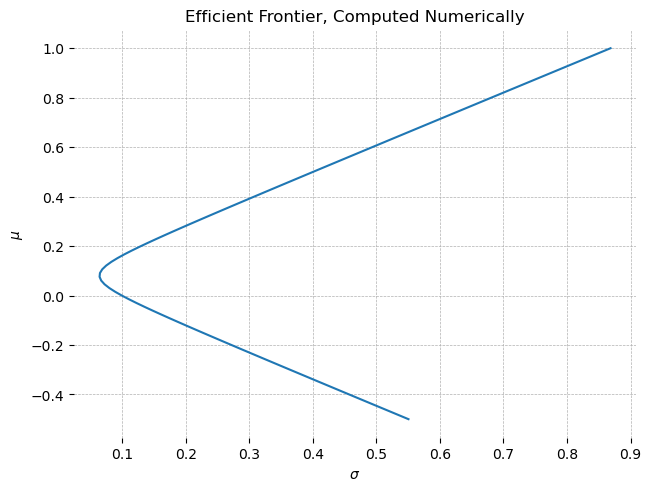

In [172]:
def compute_w(r, A_inv, b):
    n = A_inv.shape[0] - 2
    b = np.r_[np.zeros(n), 1, r]
    sol = A_inv @ b
    w, lambdas = sol[:-2], sol[-2:]
    return w

n_gridpoints = 100
r_grid = np.linspace(-0.5, 1, n_gridpoints)
sigma_grid = np.zeros_like(r_grid)

for i in range(n_gridpoints):
    weights = compute_w(r_grid[i], A_inv, b)
    
    # w @ Σ @ w.T computes the variance, take sqrt to get the volatility
    sigma_grid[i] = np.sqrt(weights @ Ω @ weights)

fig, ax = plt.subplots()
ax.plot(sigma_grid, r_grid)
ax.set(title='Efficient Frontier, Computed Numerically', ylabel='$\\mu$', xlabel='$\sigma$')
plt.show()

Of course, this approach is quite wasteful, because we know that the frontier is a quadratic function. We could just solve the polynomial:

$$\sigma^2 = \alpha + \beta_1 \mu + \beta_2 \mu^2$$

Doesn't this look just like a linear regression? We could instead solve:

$$\sigma^2 = X\beta$$

With $X = [1 \,|\, \mu \,|\, \mu^2 \,]$ is a $3 \times 3$ matrix formed by concatenating our "data" column-wise, and $\sigma^2$ is a vector of portfolio variances associated with returns $\mu$.

Unlike the usual OLS, we have no noise in this system, so we only need 3 values to pin down the 3 variables. We can use the 3 weights we computed above, for 0, 1, and 0.1955. So we will have:

$$X = \begin{bmatrix} 1 & 0 & 0^2 \\ 
                      1 & 1 & 1^2 \\
                      1 & 0.1955 & 0.1955^2 \end{bmatrix}$$
                      
All that remains is to compute $\sigma^2$. Recall that the variance of a portfolio given weights is $w \Sigma w^T$, so we just need that. Once we have it, we can just solve for $\beta$:

$$\beta = X^{-1} \sigma^2$$

We could even use the OLS formula to get $\beta$:

$$\beta = (X^T X)^{-1} X^T \sigma^2$$

But it's overkill in this case, because we're dealing with a square system.

In [212]:
σ2_values = np.array([w @ Ω @ w for w in [w_zero, w_one, w_1955]])
r_values = np.array([0, 1, 0.1955])
X = np.c_[np.ones(3), r_values, r_values ** 2]
display(sp.Matrix(X))

Matrix([
[1.0,      0,          0],
[1.0,    1.0,        1.0],
[1.0, 0.1955, 0.03822025]])

In [213]:
β = np.linalg.inv(X) @ σ2_values
β

array([ 0.0098712 , -0.14275659,  0.88709489])

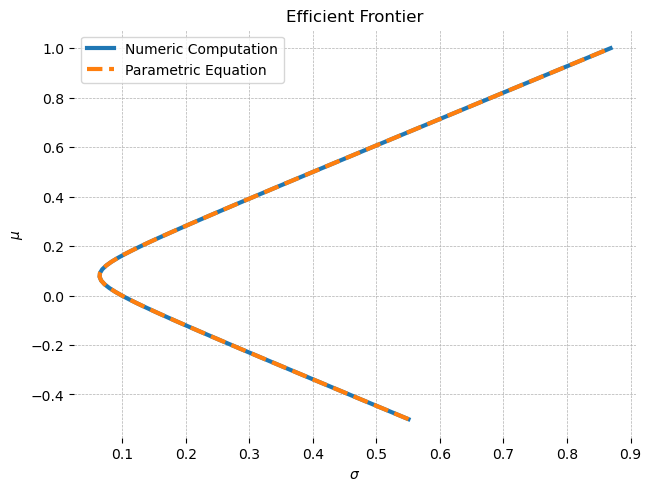

In [214]:
fig, ax = plt.subplots()

X_pred = np.c_[np.ones_like(r_grid), r_grid, r_grid ** 2]
σ2_grid = X_pred @ β
σ_grid = np.sqrt(σ2_grid)

ax.plot(sigma_grid, r_grid, label='Numeric Computation', lw=3)
ax.plot(σ_grid, r_grid, label='Parametric Equation', ls='--', lw=3)

ax.set(title='Efficient Frontier', ylabel='$\\mu$', xlabel='$\sigma$')
ax.legend()
plt.show()

# Risk-Free Asset

Now assume there is a risk-free asset that pays a return of $r_f = 0.04$. How does this change the efficient frontier? What is the impact on possible portfolios?

Recall that when there is a risk-free asset, we only care about the tangency portfolio. First, let's compute that using the equation we derived in previous classes:

$$w_{\text{tan}} = \Sigma^{-1}(r - r_f)$$

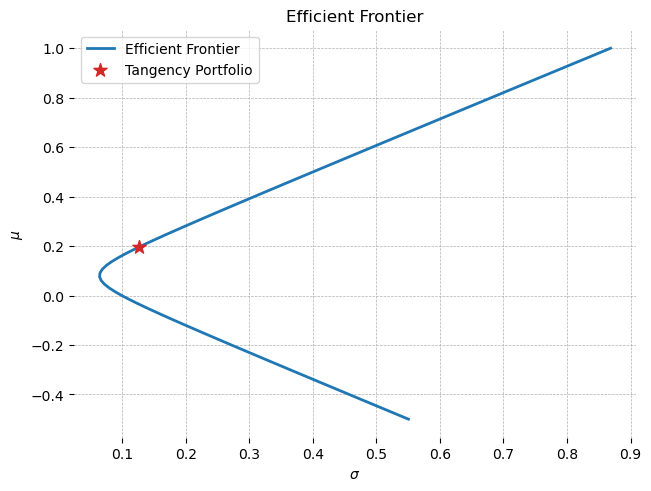

In [221]:
r_f = 0.04
excess_return = r - r_f
relative_w_tan = Ω_inv @ excess_return
w_tan = relative_w_tan / relative_w_tan.sum()

r_tan = w_tan @ r
σ2_tan = w_tan @ Ω @ w_tan
σ_tan = np.sqrt(σ2_tan)

fig, ax = plt.subplots()
ax.plot(σ_grid, r_grid, label='Efficient Frontier', lw=2)
ax.scatter(σ_tan, r_tan, marker='*', color='tab:red', label='Tangency Portfolio',
           s=100, zorder=100)
ax.set(title='Efficient Frontier', ylabel='$\\mu$', xlabel='$\sigma$')
ax.legend()
plt.show()

The new efficient frontier is going to be the capital market line, of all the portfolios formed by the risk-free asset and the tangency portfolio. Recall that the slope of the CML is the sharpe ratio of the tangency portfolio, so the CML is:

$$\mu = r_f + S_\text{tan} \sigma$$

(We derive this by choosing weights $\alpha$ on the portfolio between $r_f$ and $r_\text{tan}$ that deliver desired returns $\mu$) 

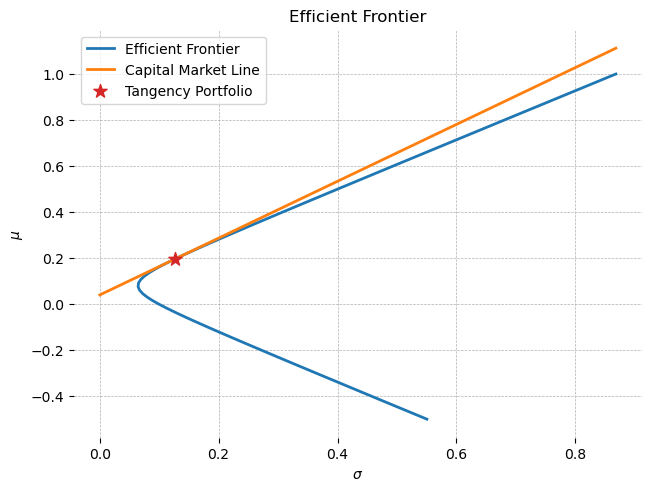

In [225]:
sharpe_tan = (r_tan - r_f) / σ_tan

σ_grid_cml = np.linspace(0, σ_grid.max(), 100)
μ_cml = r_f + sharpe_tan * σ_grid_cml

fig, ax = plt.subplots()
ax.plot(σ_grid, r_grid, label='Efficient Frontier', lw=2)
ax.plot(σ_grid_cml, μ_cml, label='Capital Market Line', lw=2)
ax.scatter(σ_tan, r_tan, marker='*', color='tab:red', label='Tangency Portfolio',
           s=100, zorder=100)
ax.set(title='Efficient Frontier', ylabel='$\\mu$', xlabel='$\sigma$')
ax.legend()
plt.show()

So now that we have the risk-free asset, the efficient frontier is the CML. That's because all the portfolios we can form from the risk-free asset and the tangency portfolio deliver higher returns for a fixed risk than any other combination of assets.

# Diversification

The mean volatility of a Norvergian stock is $\sigma = 0.3$, and the mean correlation between these stocks is $\bar{\rho} = 0.3526$.

## Question 1

Calculate the risk reduction for an equally-weighted portfolio with N assets considering respectively N =1, 2, 3, 4, 5, 10, 20, 30, 40 assets. What do you conclude?

Here we need to use this formula:

$$\sigma_p^2 = \frac{\bar{\sigma}^2}{N} + \frac{N - 1}{N } \bar \rho \bar \sigma^2$$

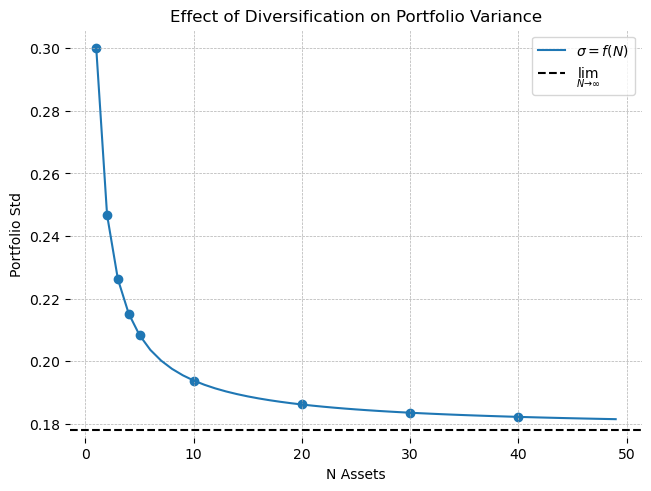

In [259]:
n_grid = np.arange(1, 50)
n = np.array([1, 2, 3, 4, 5, 10, 20, 30, 40])
sigma_bar = 0.3
rho_bar = 0.3526

limit = np.sqrt(rho_bar * sigma_bar ** 2)

sigma2_p = sigma_bar ** 2 / n_grid + (n_grid - 1) / n_grid * rho_bar * sigma_bar ** 2
sigma_p = np.sqrt(sigma2_p)

fig, ax = plt.subplots()
ax.plot(n_grid, sigma_p, label = '$\sigma = f(N)$')
ax.scatter(n, sigma_p[[x in n for x in n_grid]])
ax.axhline(limit, ls='--', color='k', label='$\lim_{N \\to \infty}$')
ax.set(xlabel='N Assets', ylabel='Portfolio Std', title='Effect of Diversification on Portfolio Variance')
ax.legend()
plt.show()

## Question 2

It's interesting to compute the limit as $N \to \infty$ of this formula:

$$\begin{align} \lim_{N \to \infty} \sigma_p^2 &= \lim_{N \to \infty} \frac{\bar{\sigma}^2}{N} + \lim_{N \to \infty} \frac{N - 1}{N } \bar \rho \bar \sigma^2\\
&= 0 + \bar \rho \bar \sigma^2 \\
\lim_{N \to \infty} \sigma_p^2 &= \bar \rho \bar \sigma^2
\end{align}$$

So the benefits of diversification will be goverened by the average correlation between all the assets in the market. Since this market is quite highly correlated, we don't get much benefit. To formalize this intuition, we could look at the marginal effect of adding one more asset:

$$\frac{\partial \sigma_p^2}{\partial N} = -\frac{(1 - \bar \rho)\bar \sigma^2}{N^2}$$

It looks like after 10 assets the marginal benefit has already slowed considerably. 

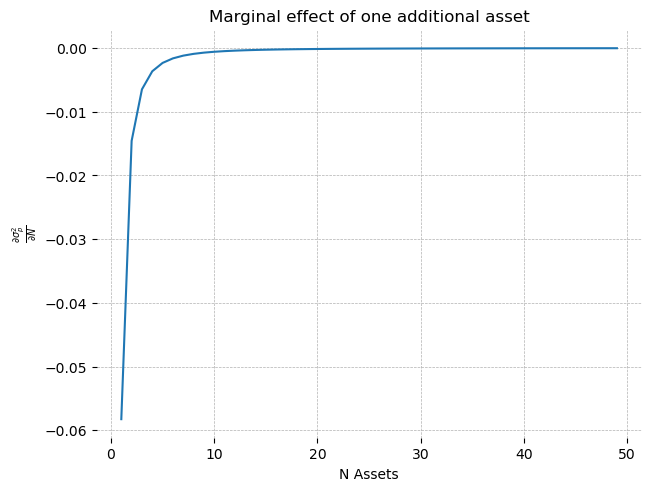

In [288]:
fig, ax = plt.subplots()
ds_dN = -(1 - rho_bar) * sigma_bar ** 2 / n_grid ** 2
ax.plot(n_grid, ds_dN)
ax.set(xlabel='N Assets', ylabel=r'$\frac{\partial \sigma^2_p}{\partial N}$', title='Marginal effect of one additional asset')
plt.show()

## Question 3

The question asks about the aphorism "a well-diversified portfolio is comprised of about 30 assets". At $N=30$, the marginal effect of one additional asset is $-\frac{(1 - \bar \rho) \bar \sigma^2}{900}$, which is going to be a pretty small number, even when rho is quite large. It seems like a fine rule of thumb. We can trace out the marginal effect of one additional asset for several values of $\bar \rho$:

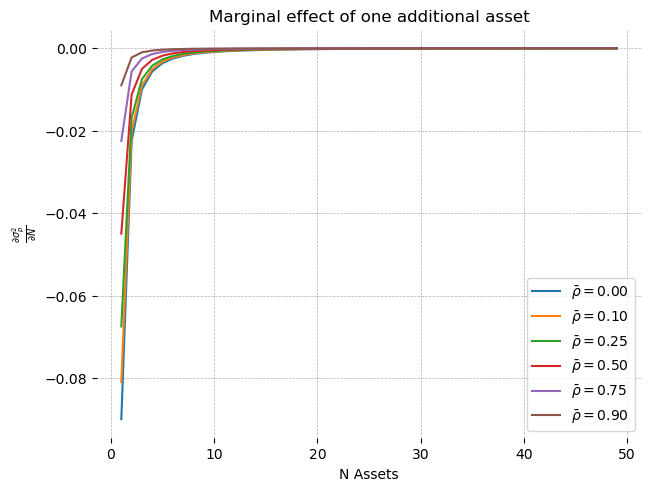

In [295]:
fig, ax = plt.subplots()
for r_bar in [0, 0.1, 0.25, 0.5, 0.75, 0.9]:
    ds_dN = -(1 - r_bar) * sigma_bar ** 2 / n_grid ** 2
    ax.plot(n_grid, ds_dN, label=r'$\bar \rho = ' + f'{r_bar:0.2f}$')
ax.set(xlabel='N Assets', ylabel=r'$\frac{\partial \sigma^2_p}{\partial N}$', title='Marginal effect of one additional asset')
ax.legend()
plt.show()